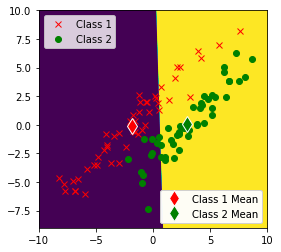

Training error on synthetic dataset: synthetic1_train.csv: 20.999999999999996


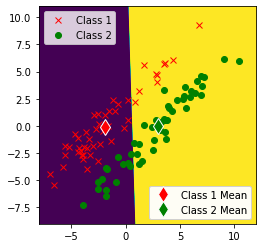

Testing error on synthetic dataset: synthetic1_test.csv: 24.0


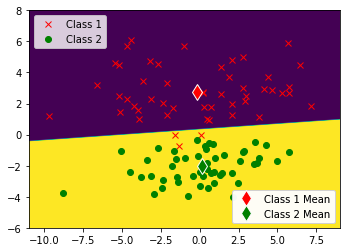

Training error on synthetic dataset: synthetic2_train.csv: 3.0000000000000027


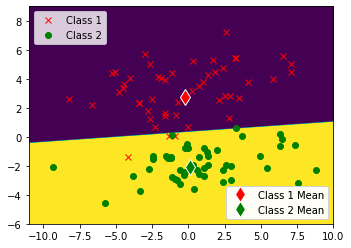

Testing error on synthetic dataset: synthetic2_test.csv: 4.0000000000000036


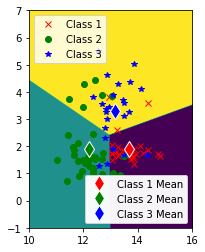

Train error on features alcohol and malic acid content 20.2247191011236


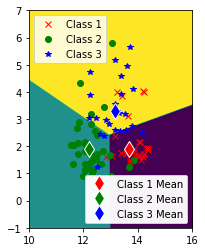

Testing error on features alcohol and malic acid content 22.47191011235955
Train Errors Dict
{(0, 1): 20.2247191011236, (0, 2): 31.46067415730337, (0, 3): 44.9438202247191, (0, 4): 56.17977528089888, (0, 5): 14.60674157303371, (0, 6): 8.98876404494382, (0, 7): 33.70786516853933, (0, 8): 16.85393258426966, (0, 9): 25.842696629213478, (0, 10): 25.842696629213478, (0, 11): 7.86516853932584, (0, 12): 24.71910112359551, (1, 2): 39.32584269662921, (1, 3): 39.32584269662921, (1, 4): 57.30337078651686, (1, 5): 29.21348314606742, (1, 6): 20.2247191011236, (1, 7): 32.58426966292135, (1, 8): 40.44943820224719, (1, 9): 24.71910112359551, (1, 10): 38.20224719101124, (1, 11): 42.69662921348315, (1, 12): 24.71910112359551, (2, 3): 47.19101123595506, (2, 4): 57.30337078651686, (2, 5): 32.58426966292135, (2, 6): 14.60674157303371, (2, 7): 51.685393258426956, (2, 8): 38.20224719101124, (2, 9): 30.33707865168539, (2, 10): 30.33707865168539, (2, 11): 29.21348314606742, (2, 12): 24.71910112359551, (3, 4): 

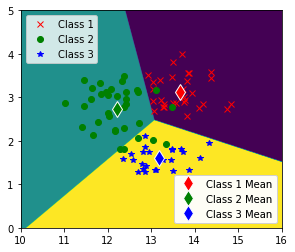

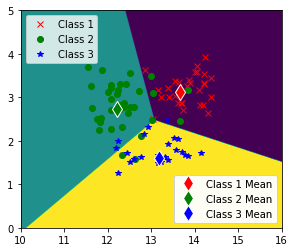

Testing error on the optimal features data set 12.35955056179775


In [1]:
import csv
import numpy as np
from plotDecBoundaries import plotDecBoundaries


def get_min_distance_class(x, sample_means, num_classes):
    """
    Finds the distance between the sample mean and data point and returns the class with the minimum value.
    """
    distances = []
    for i in range(num_classes):
        distances.append(np.linalg.norm(x-sample_means[i]))
    return np.argmin(distances) + 1


def get_sample_mean(data):
    """
    Compute the sample mean for the data points
    """
    return np.mean(data, axis=0)


def read_data(file_name):
    """
    Reads the data from the file and converts into numpy array of dtype float
    """
    data = []
    with open(file_name) as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            data.append(convert_to_float(row))
    return np.asarray(data)


def convert_to_float(row):
    """
    Converts a row of string to row of floats
    """
    return list(map(float, row))


def filter_by_labels(data, labels):
    """
    Filters the data based on labels provided
    Returns a labels_dict containing label as key and filtered rows as value
    """
    label_dict = {}
    for label in labels:
        filtered_rows = []
        for row in data:
            if int(row[2]) == label:
                filtered_rows.append(row[:2])
        label_dict[label] = np.asarray(filtered_rows)
    return label_dict


def get_all_sample_means(labels_dict):
    """
    Computes the sample mean for all labels and appends it into a single array
    """
    sample_means = []
    for label in labels_dict:
        sample_means.append(get_sample_mean(labels_dict[label]))
    return np.asarray(sample_means)


def classify(data, labels, sample_means, num_classes):
    """
    Classifies the data points based on the sample means for each of the classes
    Returns the error rate for the input data
    """
    pred_correct = 0
    for (x,y) in zip(data, labels):
        if get_min_distance_class(x, sample_means, num_classes) == int(y):
            pred_correct += 1
    return (1 - (pred_correct/len(labels))) * 100.0


def do_train_synthetic(input_file):
    """
    Performs training on synthetic data
    """
    data = read_data(input_file)
    labels_dict = filter_by_labels(data, [1, 2])
    combined_sample_means = get_all_sample_means(labels_dict)
    error = classify(data[:, 0:2], data[:, -1], combined_sample_means, num_classes=2)
    plotDecBoundaries(data[:, 0:2], data[:, -1], combined_sample_means)
    print(f"Training error on synthetic dataset: {input_file}: {error}")
    return combined_sample_means


def do_test_synthetic(input_file, sample_means):
    """
    Performs classification on test data
    """
    data = read_data(input_file)
    error =classify(data[:, 0:2], data[:, -1], sample_means, num_classes=2)
    plotDecBoundaries(data[:, 0:2], data[:, -1], sample_means)
    print(f"Testing error on synthetic dataset: {input_file}: {error}")


def synthetic():
    combined_sample_means = do_train_synthetic('synthetic1_train.csv')
    do_test_synthetic('synthetic1_test.csv', combined_sample_means)
    combined_sample_means = do_train_synthetic('synthetic2_train.csv')
    do_test_synthetic('synthetic2_test.csv', combined_sample_means)


def wine_classification():
    train_data = read_data('wine_train.csv')
    test_data= read_data('wine_test.csv')
    new_data = train_data[:, [0,1,-1]]
    labels_dict = filter_by_labels(new_data, [1, 2, 3])
    combined_sample_means = get_all_sample_means(labels_dict)
    error = classify(new_data[:, 0:2], new_data[:, -1], combined_sample_means, num_classes=3)
    plotDecBoundaries(new_data[:, 0:2], new_data[:, -1], combined_sample_means)
    print(f"Train error on features alcohol and malic acid content {error}")
    test_error = classify(test_data[:, 0:2], test_data[:, -1], combined_sample_means, num_classes=3)
    plotDecBoundaries(test_data[:, 0:2], test_data[:, -1], combined_sample_means)
    print(f"Testing error on features alcohol and malic acid content {test_error}")
    errors_dict = {}
    test_errors_dict = {}
    for i in range(13):
        for j in range(i+1, 13):
            new_data = train_data[:, [i,j, -1]]
            labels_dict = filter_by_labels(new_data, [1, 2, 3])
            combined_sample_means = get_all_sample_means(labels_dict)
            x = new_data[:, 0:2]
            y = new_data[:, -1]
            error = classify(x, y, combined_sample_means, num_classes=3)
            errors_dict[(i, j)] = error
            test_error = classify(test_data[:, [i, j]], test_data[:, -1], combined_sample_means, num_classes=3)
            test_errors_dict[(i, j)] = test_error
    (optimal_i, optimal_j) = (min(errors_dict, key=errors_dict.get))
    print("Train Errors Dict")
    print(errors_dict)
    print("Test Errors Dict")
    print(test_errors_dict)
    print(f"Minimum error obtained on iteration at {optimal_i} {optimal_j} {min(errors_dict.values())}")
    new_data = train_data[:, [optimal_i,optimal_j, -1]]
    labels_dict = filter_by_labels(new_data, [1,2,3])
    combined_sample_means = get_all_sample_means(labels_dict)
    plotDecBoundaries(new_data[:, 0:2], new_data[:, -1], combined_sample_means)
    test_error = classify(test_data[:, [optimal_i, optimal_j]], test_data[:, -1], combined_sample_means, num_classes=3)
    plotDecBoundaries(test_data[:, [optimal_i, optimal_j]], test_data[:, -1], combined_sample_means)
    print(f"Testing error on the optimal features data set {test_error}")


def main():
    synthetic()
    wine_classification()

if __name__ == "__main__":
    main()